### SeasFire Datacube access and basic analytics
By Lazaro Alonso

Activate env

In [1]:
using Pkg; Pkg.activate(".")

  Activating project at `~/SeasFire/CubesAssemble/Julia-Tutorial`


Install basic packages

In [ ]:
#Pkg.add(["StatsBase","LinearAlgebra","Zarr", "YAXArrays", "CairoMakie"])
#Pkg.add(url="https://github.com/lazarusA/EarthDataVis.git")
#Pkg.rm("EarthDataVis") # not working now, project still in progress

In [21]:
Pkg.status()

      Status `~/SeasFire/CubesAssemble/Julia-Tutorial/Project.toml`
  [13f3f980] CairoMakie v0.8.10
  [2913bbd2] StatsBase v0.33.18
  [c21b50f5] YAXArrays v0.3.0
  [0a941bbe] Zarr v0.7.2
  [37e2e46d] LinearAlgebra


Start using the packages

In [6]:
using YAXArrays, Zarr
using CairoMakie
using EarthDataVis

Read cube from local path. However, downloading the dataset is also possible.
`!wget -r -m ftp://ftp.bgc-jena.mpg.de/pub/outgoing/lalonso/SeasFireCube`

In [7]:
localpath = "/Net/Groups/BGI/work_1/scratch/lalonso/SeasFireCube8daily_v3.zarr"
SFCube = Cube(localpath) # a zenodo link to the zarr file here should just work.


YAXArray with the following dimensions
longitude           Axis with 1440 Elements from -179.875 to 179.875
latitude            Axis with 720 Elements from 89.875 to -89.875
time                Axis with 966 Elements from 2001-01-01T12:00:00 to 2021-12-27T12:00:00
Variable            Axis with 35 elements: drought_code_max epo .. NDVI gmsst 
Total size: 130.59 GB


Get a subset of variables for year 2001

In [8]:
c = SFCube[variable=["NDVI", "BAs_GWIS", "ws10"], time = 2001:2001]

YAXArray with the following dimensions
longitude           Axis with 1440 Elements from -179.875 to 179.875
latitude            Axis with 720 Elements from 89.875 to -89.875
time                Axis with 46 Elements from 2001-01-01T12:00:00 to 2001-12-27T12:00:00
Variable            Axis with 3 elements: NDVI BAs_GWIS ws10 
Total size: 545.8 MB


In [9]:
#trigger donwload
cube = readcubedata(c)

YAXArray with the following dimensions
longitude           Axis with 1440 Elements from -179.875 to 179.875
latitude            Axis with 720 Elements from 89.875 to -89.875
time                Axis with 46 Elements from 2001-01-01T12:00:00 to 2001-12-27T12:00:00
Variable            Axis with 3 elements: NDVI BAs_GWIS ws10 
Total size: 545.8 MB


In [17]:
ndvi = cube[variable = "NDVI"]

YAXArray with the following dimensions
longitude           Axis with 1440 Elements from -179.875 to 179.875
latitude            Axis with 720 Elements from 89.875 to -89.875
time                Axis with 46 Elements from 2001-01-01T12:00:00 to 2001-12-27T12:00:00
Total size: 181.93 MB


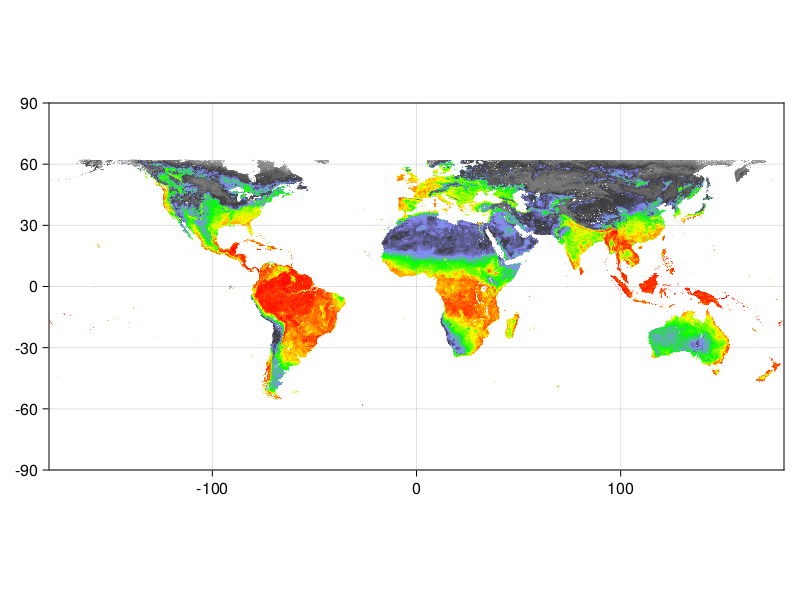

In [18]:
heatmap(ndvi.longitude.values, ndvi.latitude.values, ndvi.data[:,:,2]; colormap = :fastie,
    colorrange = (-1, 1),
    axis = (;aspect = DataAspect()))

In [22]:
fire = cube[variable = "BAs_GWIS"]

YAXArray with the following dimensions
longitude           Axis with 1440 Elements from -179.875 to 179.875
latitude            Axis with 720 Elements from 89.875 to -89.875
time                Axis with 46 Elements from 2001-01-01T12:00:00 to 2001-12-27T12:00:00
Total size: 181.93 MB


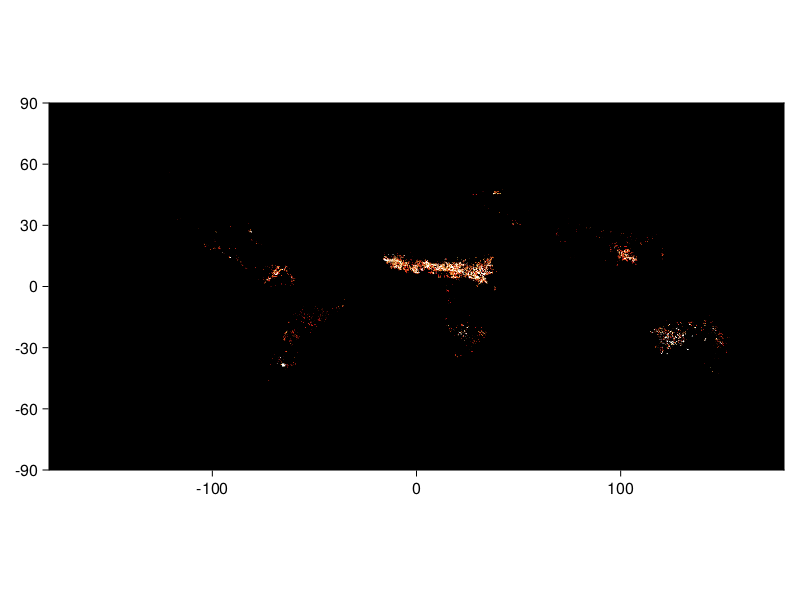

In [37]:
heatmap(fire.longitude.values, fire.latitude.values, fire.data[:,:,2];
    colormap = Reverse(:linear_wyor_100_45_c55_n256),
    colorrange = (1,2000),
    lowclip=:black,
    highclip = :white,
    axis = (;aspect = DataAspect()))

In [38]:
ws10 = cube[variable = "ws10"]

YAXArray with the following dimensions
longitude           Axis with 1440 Elements from -179.875 to 179.875
latitude            Axis with 720 Elements from 89.875 to -89.875
time                Axis with 46 Elements from 2001-01-01T12:00:00 to 2001-12-27T12:00:00
Total size: 181.93 MB


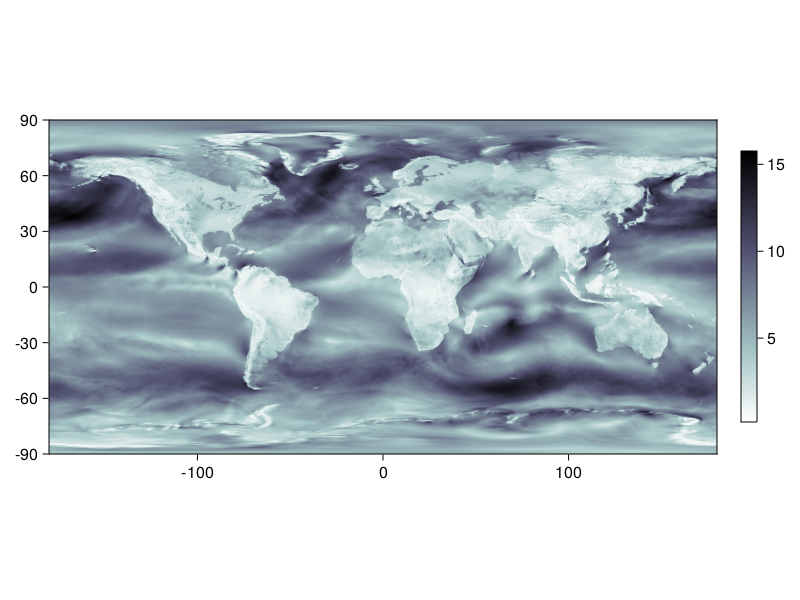

In [46]:
fig, ax, obj = heatmap(ws10.longitude.values, ws10.latitude.values, ws10.data[:,:,2];
    colormap = Reverse(:bone_1),
    axis = (;aspect = DataAspect()))
Colorbar(fig[1,2], obj, height = Relative(0.5))
#colsize!(fig.layout, 1, Aspect(1, 1.25))
fig

Basic stats across the time dimension

In [53]:
using StatsBase
μcube = mapslices(mean, cube, dims=("time"))


┌ Warning: There are still cache misses
└ @ YAXArrays.DAT /User/homes/lalonso/.julia/packages/YAXArrays/Ly8sc/src/DAT/DAT.jl:1022
Progress:  33%|█████████████▋                           |  ETA: 0:00:08

Progress: 100%|█████████████████████████████████████████| Time: 0:00:08


YAXArray with the following dimensions
longitude           Axis with 1440 Elements from -179.875 to 179.875
latitude            Axis with 720 Elements from 89.875 to -89.875
Variable            Axis with 3 elements: NDVI BAs_GWIS ws10 
Total size: 11.87 MB


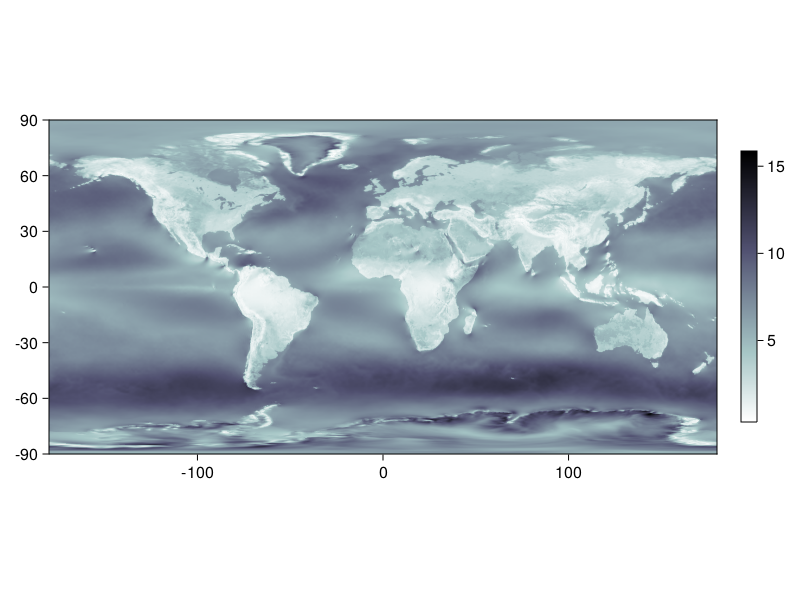

In [61]:
fig, ax, obj = heatmap(ws10.longitude.values, ws10.latitude.values, μcube[variable="ws10"].data[:,:];
    colormap = Reverse(:bone_1),
    axis = (;aspect = DataAspect()))
Colorbar(fig[1,2], obj, height = Relative(0.5))
#colsize!(fig.layout, 1, Aspect(1, 1.25))
fig

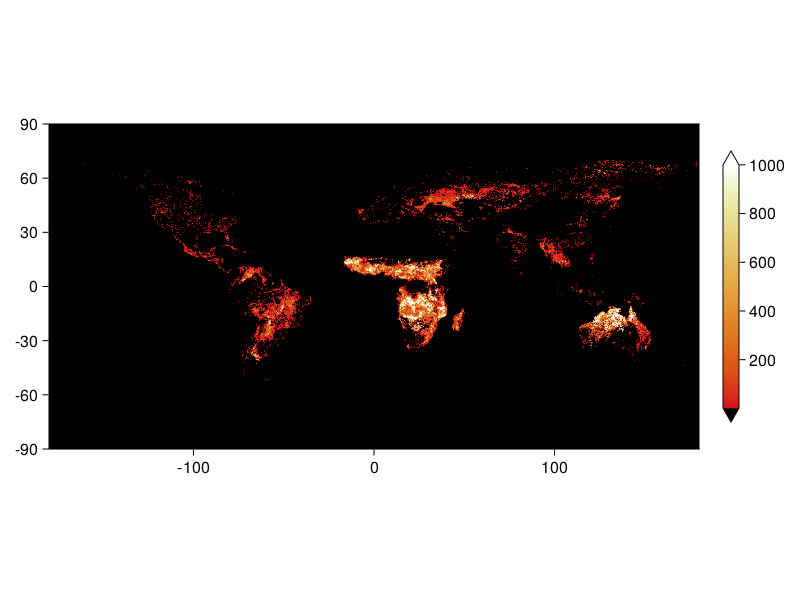

In [63]:
fig, ax, obj = heatmap(fire.longitude.values, fire.latitude.values, μcube[variable="BAs_GWIS"].data[:,:];
    colormap = Reverse(:linear_wyor_100_45_c55_n256),
    colorrange = (1,1000),
    lowclip=:black,
    highclip = :white,
    axis = (;aspect = DataAspect()))
Colorbar(fig[1,2], obj, height = Relative(0.5))
#colsize!(fig.layout, 1, Aspect(1, 1.25))
fig

More operations can be defined over any cube dimension. In future updates more options will be available.